In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier



import warnings 
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv(r'C:\Users\win10\Downloads\diabetes.csv')

In [3]:
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [5]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [6]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [7]:
df.nunique()

Pregnancies                  17
Glucose                     136
BloodPressure                47
SkinThickness                51
Insulin                     186
BMI                         248
DiabetesPedigreeFunction    517
Age                          52
Outcome                       2
dtype: int64

In [8]:
df.drop_duplicates(inplace = True)

In [9]:
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [10]:
Q3=np.percentile(df.describe(),75)
Q1=np.percentile(df.describe(),25)
Q2=np.percentile(df.describe(),50)


IQR=Q3-Q1
print('Q2:',Q2)
print('Q3:',Q3)
print('Q1:',Q1)
print('IQR:',IQR)

Q2: 25.65
Q3: 99.0
Q1: 0.5889253443106992
IQR: 98.4110746556893


In [11]:
lower = Q1 - 1.5*IQR
upper = Q3 + 1.5*IQR

In [12]:
upper_array = np.where(df.describe() >= upper)[0]
lower_array = np.where(df.describe() <= lower)[0]
 

df.drop(index=upper_array, inplace=True)
df.drop(index=lower_array, inplace=True)

print("New Shape: ", df.shape)

New Shape:  (766, 9)


In [13]:
from scipy import stats
skew=stats.skew(df.describe())
print('skewness:',skew)

skewness: [2.26606483 1.97671122 2.16868423 2.20671951 1.10372484 2.24130547
 2.26775294 2.23928696 2.26777615]


In [14]:
log_transformed_data = np.log(skew)

In [15]:
print('skewness:',log_transformed_data)

skewness: [0.81804477 0.68143446 0.77412064 0.79150703 0.09869068 0.80705849
 0.81878945 0.8061575  0.81879968]


In [16]:
corre=stats.spearmanr(df.describe())

In [17]:
corre

SignificanceResult(statistic=array([[1.        , 0.92857143, 0.88095238, 0.92217222, 0.94612475,
        0.88095238, 0.97619048, 0.85714286, 0.94523009],
       [0.92857143, 1.        , 0.97619048, 0.93414848, 0.81438586,
        0.97619048, 0.97619048, 0.97619048, 0.7979215 ],
       [0.88095238, 0.97619048, 1.        , 0.95810101, 0.79043333,
        1.        , 0.95238095, 0.95238095, 0.74881864],
       [0.92217222, 0.93414848, 0.95810101, 1.        , 0.87951807,
        0.95810101, 0.97007727, 0.8982197 , 0.82741275],
       [0.94612475, 0.81438586, 0.79043333, 0.87951807, 1.        ,
        0.79043333, 0.8982197 , 0.73055202, 0.93855775],
       [0.88095238, 0.97619048, 1.        , 0.95810101, 0.79043333,
        1.        , 0.95238095, 0.95238095, 0.74881864],
       [0.97619048, 0.97619048, 0.95238095, 0.97007727, 0.8982197 ,
        0.95238095, 1.        , 0.92857143, 0.87157579],
       [0.85714286, 0.97619048, 0.95238095, 0.8982197 , 0.73055202,
        0.95238095, 0.928571

In [18]:
corre  = df.describe().values.reshape((2, -1))

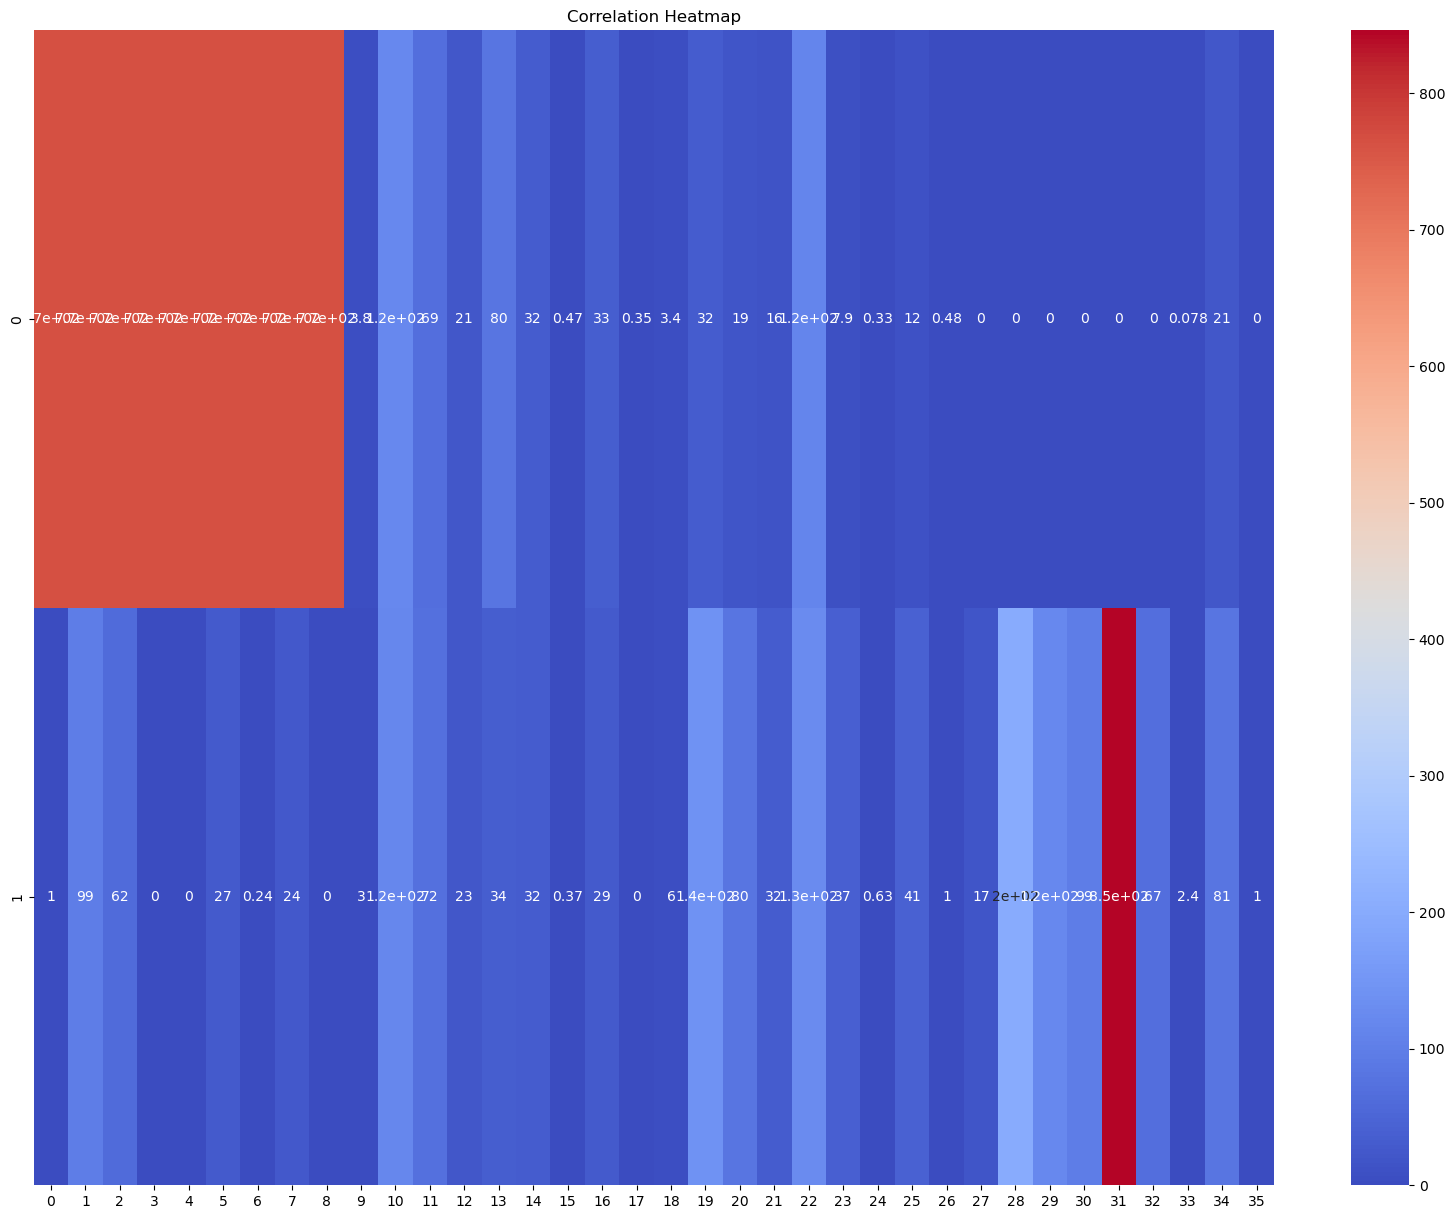

In [19]:
plt.figure(figsize=(20, 15))


sns.heatmap(corre,annot=True,cmap="coolwarm") 


plt.title("Correlation Heatmap")
plt.show()

In [20]:
corre.shape

(2, 36)

In [21]:
df_subset=df[['DiabetesPedigreeFunction','Age','Outcome']]

In [22]:
%matplotlib inline

Text(0.5, 1.0, "Histogram with pdf for feature 'DiabetesPedigreeFunction'")

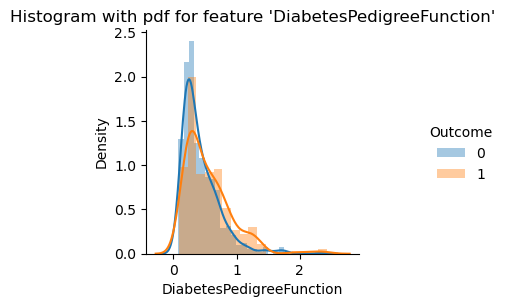

In [23]:
sns.FacetGrid(df_subset,hue='Outcome').map(sns.distplot,'DiabetesPedigreeFunction').add_legend()
plt.title("Histogram with pdf for feature 'DiabetesPedigreeFunction'")

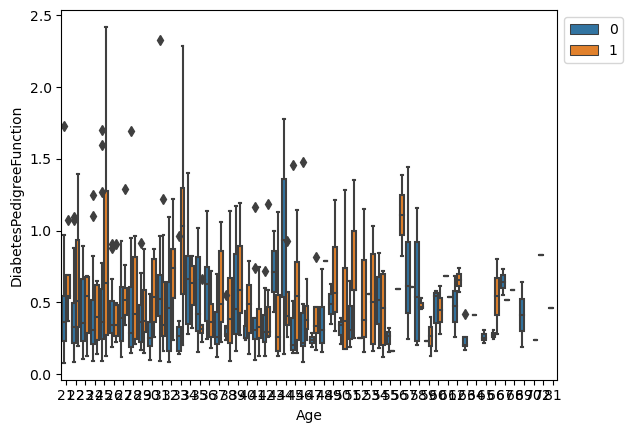

In [24]:
sns.boxplot(data=df_subset,x='Age', y='DiabetesPedigreeFunction',hue='Outcome')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))

<Axes: xlabel='Age', ylabel='DiabetesPedigreeFunction'>

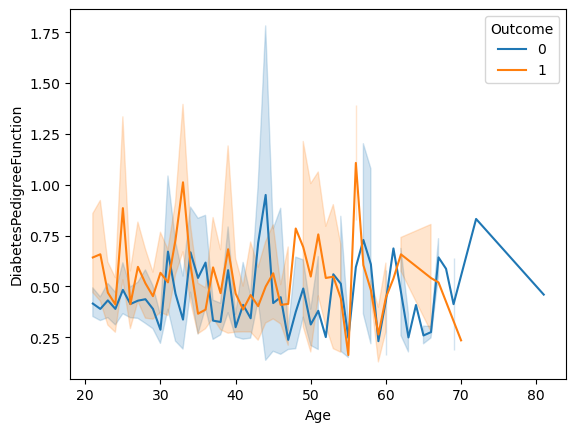

In [25]:
sns.lineplot(data=df_subset,x='Age', y='DiabetesPedigreeFunction',hue='Outcome')

<Axes: xlabel='Age', ylabel='DiabetesPedigreeFunction'>

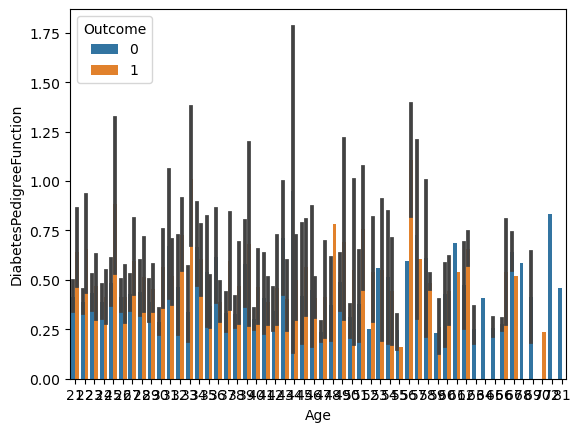

In [26]:
sns.barplot(data=df_subset,x='Age', y='DiabetesPedigreeFunction',hue='Outcome')

<Axes: xlabel='Age', ylabel='DiabetesPedigreeFunction'>

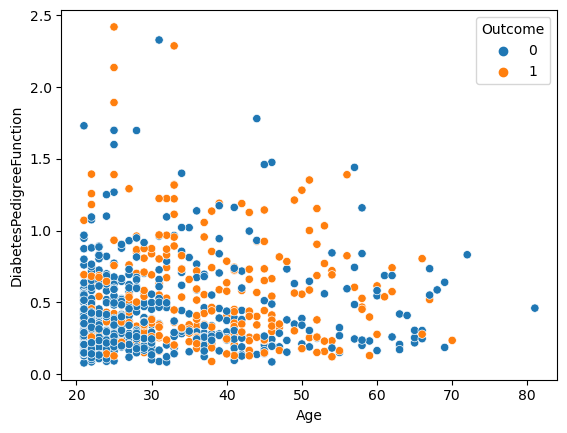

In [27]:
sns.scatterplot(data=df_subset,x='Age', y='DiabetesPedigreeFunction',hue='Outcome')

<Axes: xlabel='Age', ylabel='DiabetesPedigreeFunction'>

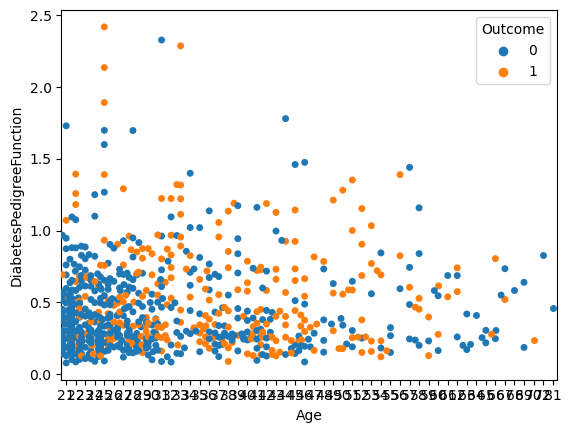

In [28]:
sns.swarmplot(data=df_subset,x='Age', y='DiabetesPedigreeFunction',hue='Outcome')

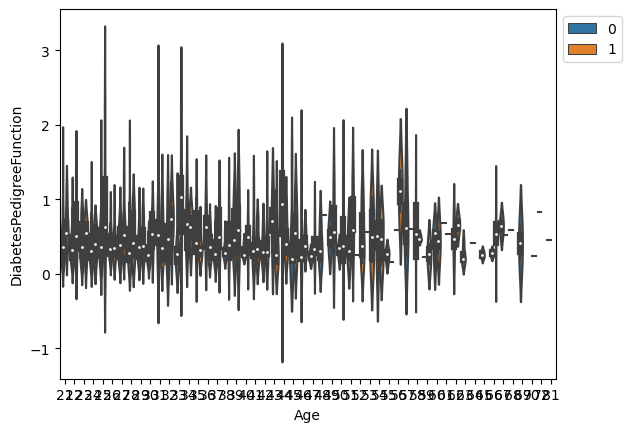

In [29]:
sns.violinplot(data=df_subset,x='Age', y='DiabetesPedigreeFunction',hue='Outcome')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))

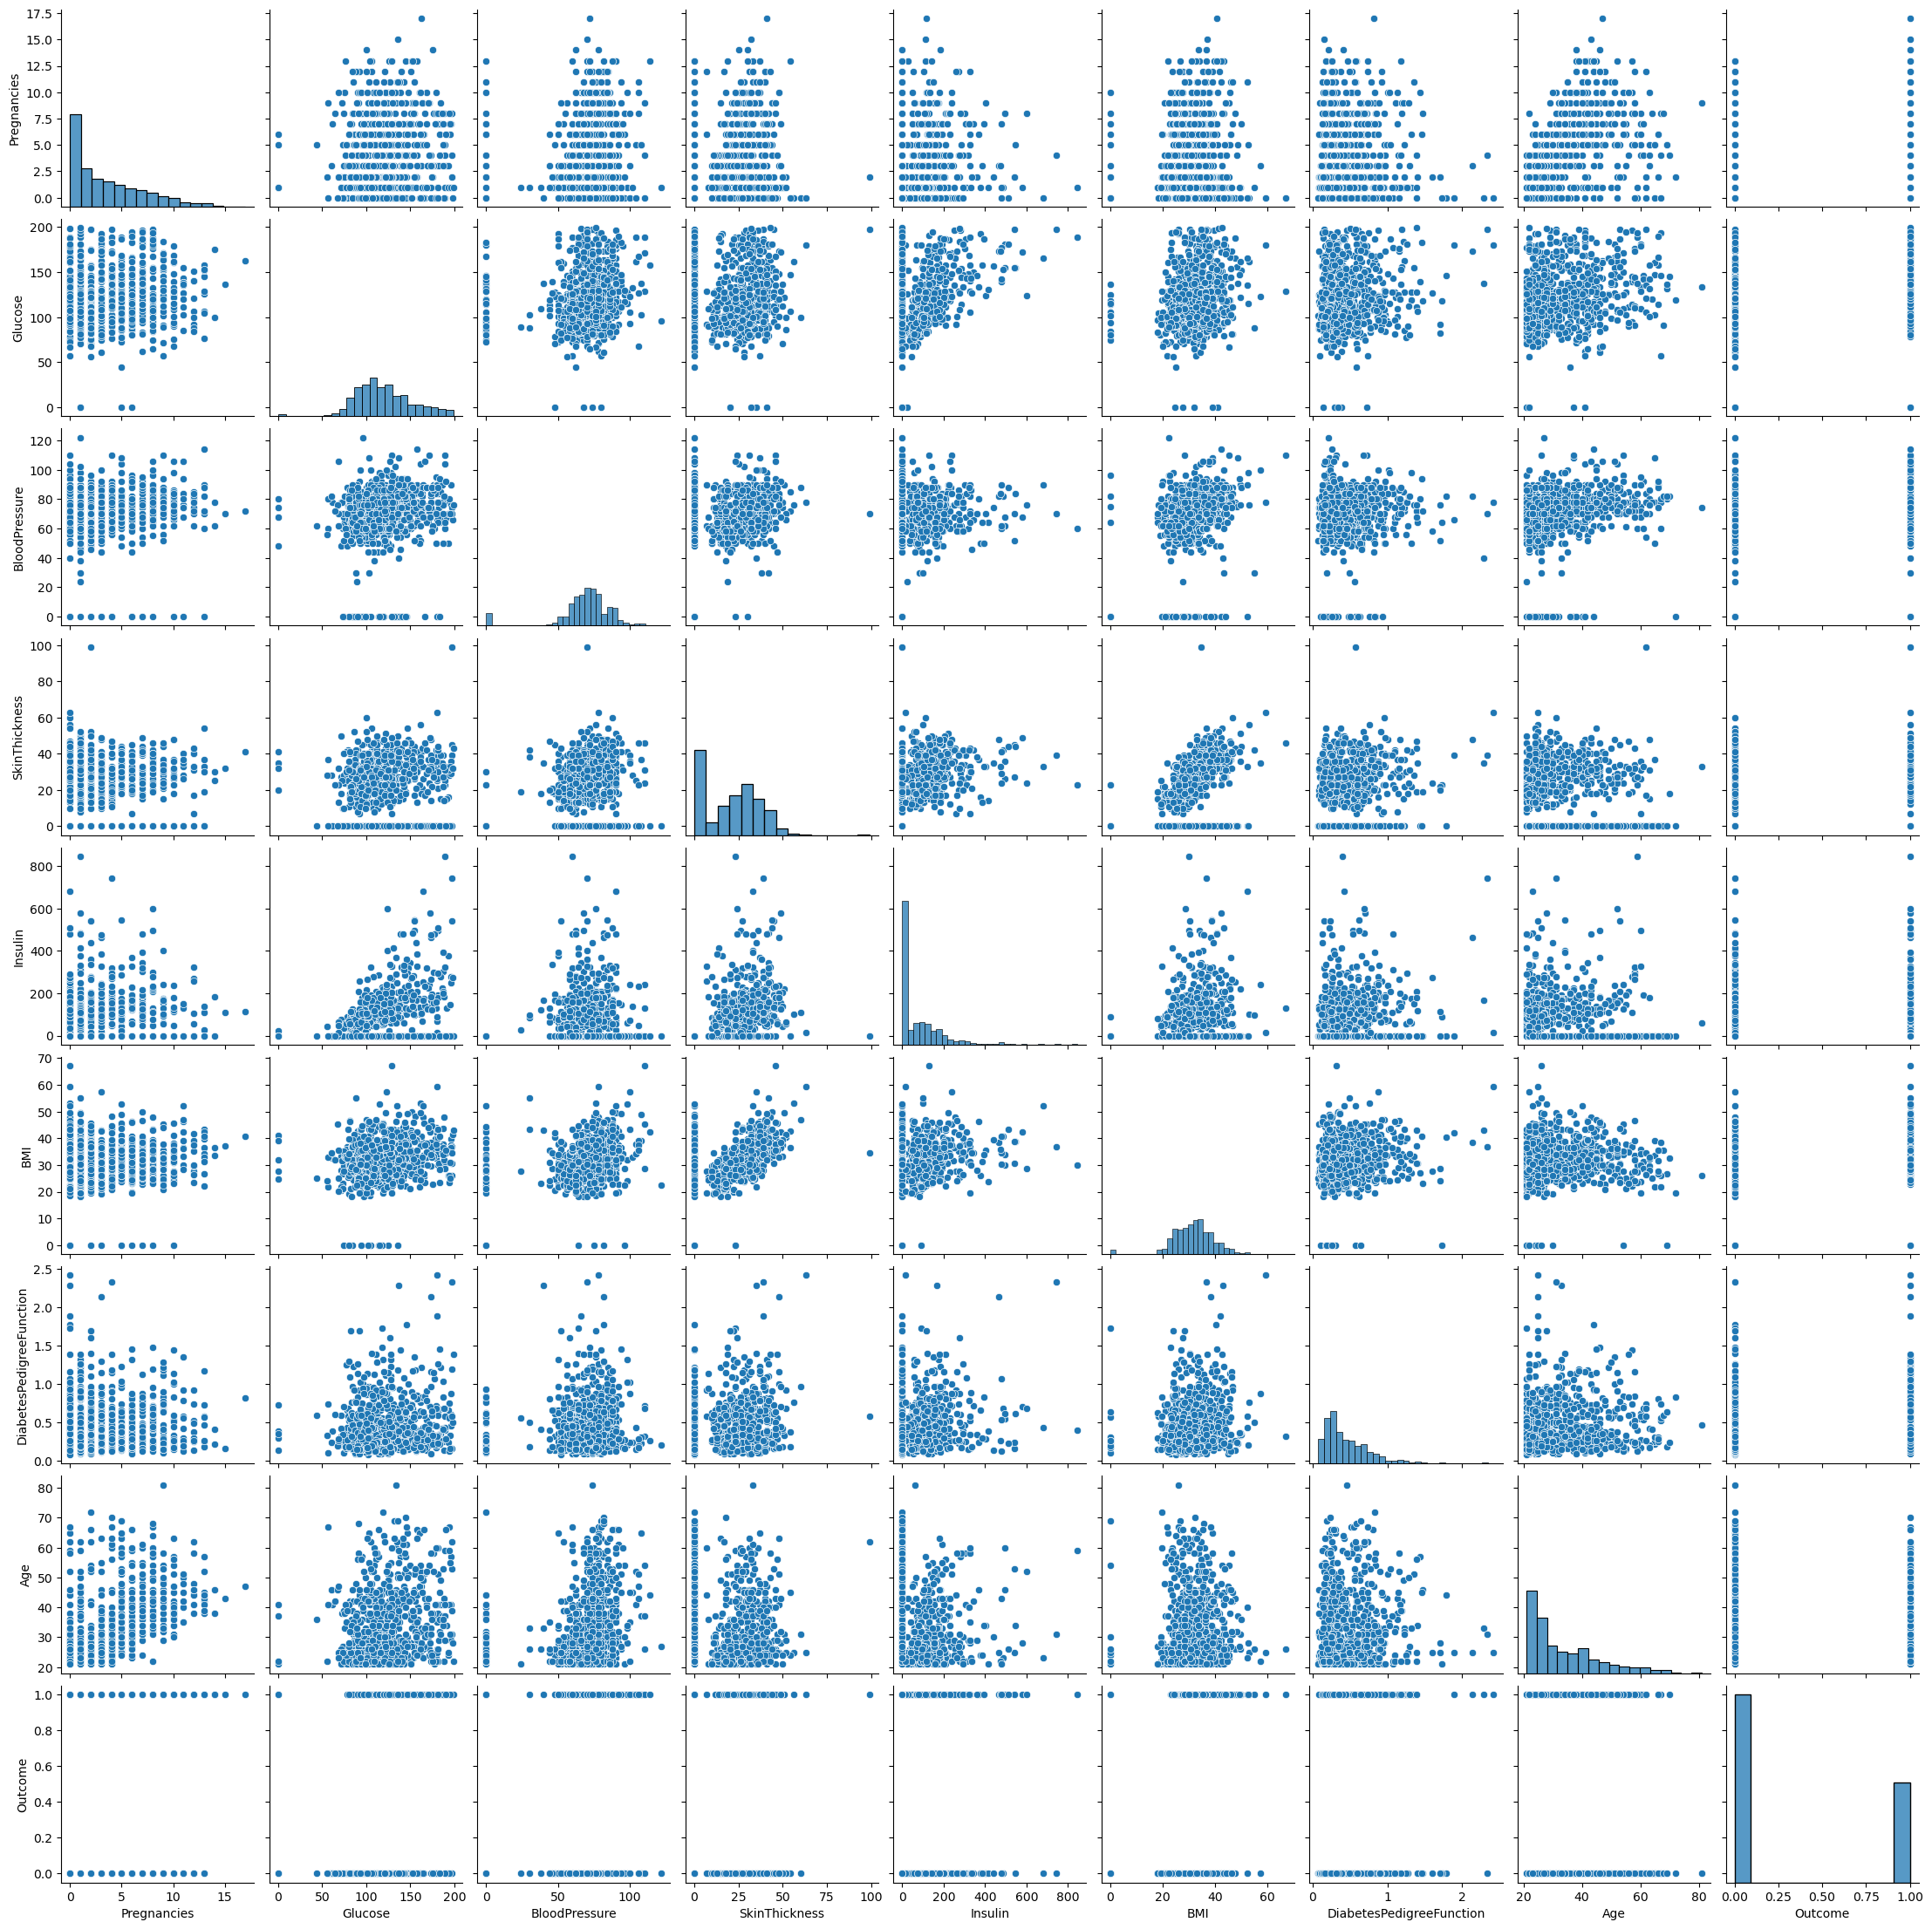

In [30]:
sns.pairplot(df)

# Model Development

In [31]:
y=df['Outcome']
x=df.drop(['Outcome'], axis=1)

In [32]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.20,random_state=88)

# Naive bayes

In [33]:
classifier=GaussianNB()

In [34]:
classifier.fit(x_train,y_train)

print(f"Training score : {classifier.score(x_train,y_train)}")
print(f"Testing score : {classifier.score(x_test,y_test)}")

Training score : 0.7712418300653595
Testing score : 0.7532467532467533


In [35]:
y_pred=classifier.predict(x_test)

In [36]:
from sklearn.metrics import accuracy_score
acc=accuracy_score(y_test,y_pred)
print('Accuracy score:', acc)

Accuracy score: 0.7532467532467533


In [37]:
print('Accuracy:', metrics.accuracy_score(y_test,y_pred))

Accuracy: 0.7532467532467533


In [38]:
print('classification report:', metrics.classification_report(y_test,y_pred))

classification report:               precision    recall  f1-score   support

           0       0.77      0.87      0.82        98
           1       0.70      0.55      0.62        56

    accuracy                           0.75       154
   macro avg       0.74      0.71      0.72       154
weighted avg       0.75      0.75      0.75       154



In [39]:
cm=metrics.confusion_matrix(y_test,y_pred)
print('confusion matrixs:',cm )

confusion matrixs: [[85 13]
 [25 31]]


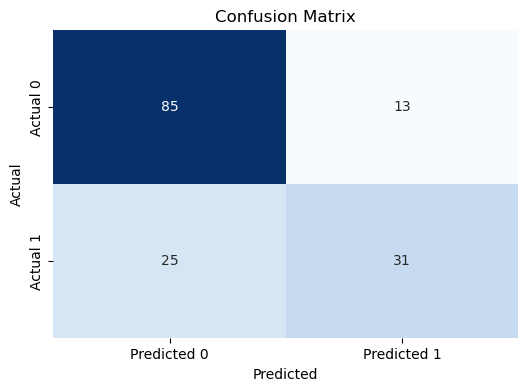

In [40]:
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# KNN

In [41]:
k=3
knn_model=KNeighborsClassifier(n_neighbors=k)
knn_model.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=3)

In [42]:
print(f"Training score : {knn_model.score(x_train,y_train)}")
print(f"Testing score : {knn_model.score(x_test,y_test)}")

Training score : 0.8594771241830066
Testing score : 0.6883116883116883


In [43]:
y_pred=classifier.predict(x_test)

In [44]:
acc=accuracy_score(y_test,y_pred)
print('Accuracy score:', acc)

Accuracy score: 0.7532467532467533


In [45]:
print('classification report:', metrics.classification_report(y_test,y_pred))

classification report:               precision    recall  f1-score   support

           0       0.77      0.87      0.82        98
           1       0.70      0.55      0.62        56

    accuracy                           0.75       154
   macro avg       0.74      0.71      0.72       154
weighted avg       0.75      0.75      0.75       154



In [46]:
cm=metrics.confusion_matrix(y_test,y_pred)
print('confusion matrixs:',cm )

confusion matrixs: [[85 13]
 [25 31]]


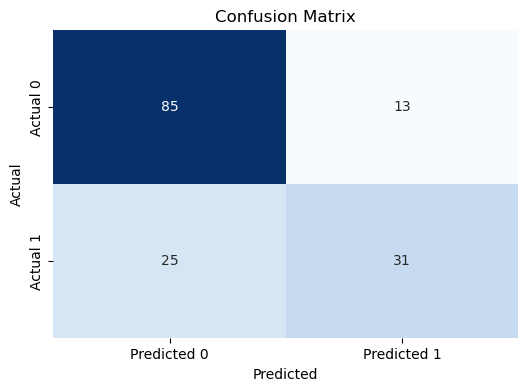

In [47]:
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
#Naive bayes accuracy:-0.7532467532467533
#KNN accuracy:-0.7532467532467533